In [2]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
import warnings
warnings.simplefilter('ignore')

with open('./snowFallData/dataSet_N_0.csv', newline='') as f:
    data = list(csv.reader(f))
train_0_x = [x[:-1] for x in data[1:]  if x[-1]!=-1]
train_0_y = [x[-1] for x in data[1:] if x[-1]!=-1]

with open('./snowFallData/dataSet_N_1.csv', newline='') as f:
    data = list(csv.reader(f))
train_1_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
train_1_y = [x[-1] for x in data[1:]   if x[-1]!=-1]

with open('./snowFallData/dataSet_N_2.csv', newline='') as f:
    data = list(csv.reader(f))
train_2_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
train_2_y = [x[-1] for x in data[1:]   if x[-1]!=-1]

with open('./snowFallData/dataSet_N_3.csv', newline='') as f:
    data = list(csv.reader(f))
train_3_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
train_3_y = [x[-1] for x in data[1:]   if x[-1]!=-1]

with open('./snowFallData/valSet_N_0.csv', newline='') as f:
    data = list(csv.reader(f))
test_0_x = [x[:-1] for x in data[1:]  if x[-1]!=-1]
test_0_y = [x[-1] for x in data[1:] if x[-1]!=-1]

with open('./snowFallData/valSet_N_1.csv', newline='') as f:
    data = list(csv.reader(f))
test_1_x = [x[:-1] for x in data[1:]]
test_1_y = [x[-1] for x in data[1:]]

with open('./snowFallData/valSet_N_2.csv', newline='') as f:
    data = list(csv.reader(f))
test_2_x = [x[:-1] for x in data[1:]]
test_2_y = [x[-1] for x in data[1:]]


with open('./snowFallData/valSet_N_3.csv', newline='') as f:
    data = list(csv.reader(f))
test_3_x = [x[:-1] for x in data[1:]   if x[-1]!=-1]
test_3_y = [x[-1] for x in data[1:]   if x[-1]!=-1]



In [4]:
def k_fold_cross(model, k, x_train, y_train):
    error=[]
    for i in range(k):
        low_index=int(i*len(x_train)/k)
        high_index=int((i+1)*len(x_train)/k)
        temp=model.fit(x_train[:low_index]+x_train[high_index:], y_train[:low_index]+y_train[high_index:])
        error.append( 1-temp.score(x_train[low_index:high_index], y_train[low_index:high_index])) 
    return sum(error)/len(error) 


In [28]:
def plot_ax(ax, clf, score_0, score_1, score_2, score_3, x_axis):
    ax.plot(x_axis, score_0, label='dataSet_N_0')
    ax.plot(x_axis, score_1, label='dataSet_N_1')
    ax.plot(x_axis, score_2, label='dataSet_N_2')
    ax.plot(x_axis, score_3, label='dataSet_N_3')

    ax.set_xlabel('Number of Neighbors')
    ax.set_ylabel('Percent Error')
    ax.set_title(f'Nearest Neighbor Performance(weights: {clf.weights}, algorithm: {clf.algorithm})')
    ax.legend()


1
2
3
4


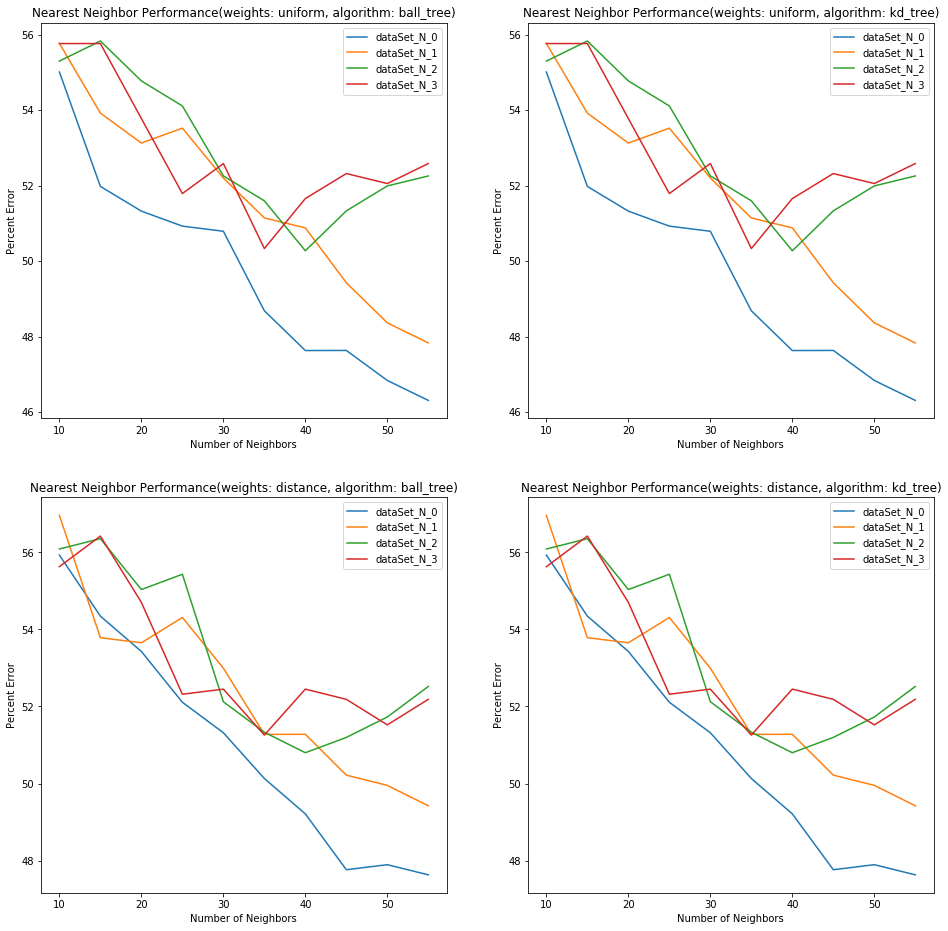

In [46]:
# setup plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))

# run the test
def run_classifier(num_of_neighbors_to_test, weight, algorithm, ax):
    score_0, score_1, score_2, score_3, x_axis=[], [], [], [], []
    for x in range(10,num_of_neighbors_to_test,5):  
        clf = KNeighborsClassifier(n_neighbors=x,weights=weight,algorithm=algorithm)
        score_0.append(k_fold_cross(clf, 5, train_0_x, train_0_y)*100)
        score_1.append(k_fold_cross(clf, 5, train_1_x, train_1_y)*100)
        score_2.append(k_fold_cross(clf, 5, train_2_x, train_2_y)*100)
        score_3.append(k_fold_cross(clf, 5, train_3_x, train_3_y)*100)

        x_axis.append(x)

    plot_ax(ax, clf, score_0, score_1, score_2, score_3, x_axis)

# setup constants
num_of_neighbors_to_test = 60
weights = ['uniform', 'distance']
algorithms = ['ball_tree', 'kd_tree']
axes = [ax1, ax2, ax3, ax4]

i = 0
for weight in weights:
    for algorithm in algorithms:
        ax = axes[i]
        run_classifier(num_of_neighbors_to_test, weight, algorithm, ax)
        i = i+1
        print(i)

# plot
plt.show()